# ETL | World Bank Datasets

**ETL stands for Extract, Transform, Load.**

We are using data from the World Bank. The data comes from two sources:

[World Bank Indicator Data](https://data.worldbank.org/indicator) - This data contains socio-economic indicators for countries around the world. A few example indicators include population, arable land, and central government debt.

[World Bank Project Data](https://datacatalog.worldbank.org/dataset/world-bank-projects-operations) - This data set contains information about World Bank project lending since 1947.

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Extract data from different sources such as:**

- csv files
- json files
- xml files
- APIs
- DataBase

**Transform data**
- combining data from different sources
- data cleaning
- data types
- parsing dates
- file encodings
- missing data
- duplicate data
- dummy variables
- remove outliers

**Load**
- send the transformed data to a database

In [ ]:
import os
for filenames in os.walk('./world-bank-datasets/'):
    for filename in filenames:
        print(filename)

./world-bank-datasets/
[]
['electricity_access_percent.csv', 'gdp_data.csv', 'mystery.csv', 'population_data.csv', 'population_data.db', 'population_data.json', 'population_data.xml', 'projects_data.csv', 'rural_population_percent.csv']


> ## Extract from CSV

In [ ]:
df_projects = pd.read_csv('./world-bank-datasets/projects_data.csv')

C:\Users\AJAY\AppData\Local\Temp\ipykernel_7780\2916235403.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_projects = pd.read_csv('./world-bank-datasets/projects_data.csv')


In [ ]:
df_projects = pd.read_csv('./world-bank-datasets/projects_data.csv',dtype='str')
df_projects.head(3)

id  regionname                                        countryname  \
0  P162228       Other                                        World;World   
1  P163962      Africa  Democratic Republic of the Congo;Democratic Re...   
2  P167672  South Asia  People's Republic of Bangladesh;People's Repub...   

  prodline                  lendinginstr lendinginstrtype  \
0       RE  Investment Project Financing               IN   
1       PE  Investment Project Financing               IN   
2       PE  Investment Project Financing               IN   

  envassesmentcategorycode supplementprojectflg productlinetype  \
0                        C                    N               L   
1                        B                    N               L   
2                      NaN                    Y               L   

  projectstatusdisplay  ... mjtheme3name mjtheme4name mjtheme5name location  \
0               Active  ...          NaN          NaN          NaN      NaN   
1               Active  ...          NaN          NaN          NaN      NaN   
2               Active  ...          NaN          NaN          NaN      NaN   

  GeoLocID GeoLocName Latitude Longitude Country Unnamed: 56  
0      NaN        NaN      NaN       NaN     NaN         NaN  
1      NaN        NaN      NaN       NaN     NaN         NaN  
2      NaN        NaN      NaN       NaN     NaN         NaN  

[3 rows x 57 columns]

In [ ]:
df_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        18248 non-null  object
 1   regionname                18248 non-null  object
 2   countryname               18248 non-null  object
 3   prodline                  18248 non-null  object
 4   lendinginstr              18002 non-null  object
 5   lendinginstrtype          18002 non-null  object
 6   envassesmentcategorycode  12437 non-null  object
 7   supplementprojectflg      18195 non-null  object
 8   productlinetype           18248 non-null  object
 9   projectstatusdisplay      18244 non-null  object
 10  status                    18244 non-null  object
 11  project_name              18248 non-null  object
 12  boardapprovaldate         16744 non-null  object
 13  board_approval_month      16744 non-null  object
 14  closingdate           

In [ ]:
df_projects.isnull().sum()

id                              0
regionname                      0
countryname                     0
prodline                        0
lendinginstr                  246
lendinginstrtype              246
envassesmentcategorycode     5811
supplementprojectflg           53
productlinetype                 0
projectstatusdisplay            4
status                          4
project_name                    0
boardapprovaldate            1504
board_approval_month         1504
closingdate                  3349
lendprojectcost               125
ibrdcommamt                     0
idacommamt                      0
totalamt                        0
grantamt                        0
borrower                     5919
impagency                    6097
url                             0
projectdoc                  18248
majorsector_percent         18248
sector1                         0
sector2                      8721
sector3                     11761
sector4                     13872
sector5       

In [ ]:
df_projects.shape

(18248, 57)

In [ ]:
df_population = pd.read_csv('./world-bank-datasets/population_data.csv')

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 63


In [ ]:
f = open("./world-bank-datasets/population_data.csv")
for i in range(10):
    line = f.readline()
    print('line: ', i, line)
f.close()

line:  0 ï»¿"Data Source","World Development Indicators",

line:  1 

line:  2 "Last Updated Date","2018-06-28",

line:  3 

line:  4 "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",

line:  5 "Aruba","ABW","Population, total","SP.POP.TOTL","54211","55438","56225","56695","57032","57360","57715","58055","58386","58726","59063","59440","59840","60243","60528","60657","60586","60366","60103","59980","60096","60567","61345","62201","62836","63026","62644","61833","61079","61032","62149","64622","68235","72504","76700","80324","83200","85451","87277","89005","90853","92898","

In [ ]:
df_population = pd.read_csv('./world-bank-datasets/population_data.csv', skiprows=4)
df_population.head(3)

Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   

        1961       1962       1963       1964       1965  ...        2009  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...    101453.0   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  28004331.0   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  22549547.0   

         2010        2011        2012        2013        2014        2015  \
0    101669.0    102053.0    102577.0    103187.0    103795.0    104341.0   
1  28803167.0  29708599.0  30696958.0  31731688.0  32758020.0  33736494.0   
2  23369131.0  24218565.0  25096150.0  25998340.0  26920466.0  27859305.0   

         2016        2017  Unnamed: 62  
0    104822.0    105264.0          NaN  
1  34656032.0  35530081.0          NaN  
2  28813463.0  29784193.0          NaN  

[3 rows x 63 columns]

In [ ]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            260 non-null    float64
 5   1961            260 non-null    float64
 6   1962            260 non-null    float64
 7   1963            260 non-null    float64
 8   1964            260 non-null    float64
 9   1965            260 non-null    float64
 10  1966            260 non-null    float64
 11  1967            260 non-null    float64
 12  1968            260 non-null    float64
 13  1969            260 non-null    float64
 14  1970            260 non-null    float64
 15  1971            260 non-null    float64
 16  1972            260 non-null    float64
 17  1973            260 non-null    flo

In [ ]:
df_population.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2014                2
2015                2
2016                2
2017                2
Unnamed: 62       264
Length: 63, dtype: int64

> ## Extract from JSON

Both JSON and XML are common formats for storing data. XML was established before JSON, and JSON has become more popular over time. They both tend to be used for sending data via web APIs.

Sometimes, you can obtain the same data in either JSON or XML format.

In [ ]:
def print_lines(n, file_name):
    f = open(file_name)
    f.readline()
    for i in range(n):
        print(f.readline())
    f.close()

In [ ]:
print_lines(100, './world-bank-datasets/population_data.json')

  {

    "Country Name": "Aruba",

    "Country Code": "ABW",

    "Indicator Name": "Population, total",

    "Indicator Code": "SP.POP.TOTL",

    "1960": 54211.0,

    "1961": 55438.0,

    "1962": 56225.0,

    "1963": 56695.0,

    "1964": 57032.0,

    "1965": 57360.0,

    "1966": 57715.0,

    "1967": 58055.0,

    "1968": 58386.0,

    "1969": 58726.0,

    "1970": 59063.0,

    "1971": 59440.0,

    "1972": 59840.0,

    "1973": 60243.0,

    "1974": 60528.0,

    "1975": 60657.0,

    "1976": 60586.0,

    "1977": 60366.0,

    "1978": 60103.0,

    "1979": 59980.0,

    "1980": 60096.0,

    "1981": 60567.0,

    "1982": 61345.0,

    "1983": 62201.0,

    "1984": 62836.0,

    "1985": 63026.0,

    "1986": 62644.0,

    "1987": 61833.0,

    "1988": 61079.0,

    "1989": 61032.0,

    "1990": 62149.0,

    "1991": 64622.0,

    "1992": 68235.0,

    "1993": 72504.0,

    "1994": 76700.0,

    "1995": 80324.0,

    "1996": 83200.0,

    "1997": 85451.0,

    "1998": 87277.0

In [ ]:
df_json = pd.read_json('./world-bank-datasets/population_data.json',orient='records')
df_json.head(3)

Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   

        1961       1962       1963       1964       1965  ...        2008  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...    101353.0   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  27294031.0   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  21759420.0   

         2009        2010        2011        2012        2013        2014  \
0    101453.0    101669.0    102053.0    102577.0    103187.0    103795.0   
1  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0  32758020.0   
2  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0  26920466.0   

         2015        2016        2017  
0    104341.0    104822.0    105264.0  
1  33736494.0  34656032.0  35530081.0  
2  27859305.0  28813463.0  29784193.0  

[3 rows x 62 columns]

In [ ]:
import json
from pprint import pprint

with open('./world-bank-datasets/population_data.json') as f:
    json_data = json.load(f)

# read the first record in the JSON file
pprint(json_data[0])
print('\n')

# show that JSON data is essentially a dictionary
print(json_data[0]['Country Name'])
print(json_data[0]['Country Code'])

{'1960': 54211.0,
 '1961': 55438.0,
 '1962': 56225.0,
 '1963': 56695.0,
 '1964': 57032.0,
 '1965': 57360.0,
 '1966': 57715.0,
 '1967': 58055.0,
 '1968': 58386.0,
 '1969': 58726.0,
 '1970': 59063.0,
 '1971': 59440.0,
 '1972': 59840.0,
 '1973': 60243.0,
 '1974': 60528.0,
 '1975': 60657.0,
 '1976': 60586.0,
 '1977': 60366.0,
 '1978': 60103.0,
 '1979': 59980.0,
 '1980': 60096.0,
 '1981': 60567.0,
 '1982': 61345.0,
 '1983': 62201.0,
 '1984': 62836.0,
 '1985': 63026.0,
 '1986': 62644.0,
 '1987': 61833.0,
 '1988': 61079.0,
 '1989': 61032.0,
 '1990': 62149.0,
 '1991': 64622.0,
 '1992': 68235.0,
 '1993': 72504.0,
 '1994': 76700.0,
 '1995': 80324.0,
 '1996': 83200.0,
 '1997': 85451.0,
 '1998': 87277.0,
 '1999': 89005.0,
 '2000': 90853.0,
 '2001': 92898.0,
 '2002': 94992.0,
 '2003': 97017.0,
 '2004': 98737.0,
 '2005': 100031.0,
 '2006': 100832.0,
 '2007': 101220.0,
 '2008': 101353.0,
 '2009': 101453.0,
 '2010': 101669.0,
 '2011': 102053.0,
 '2012': 102577.0,
 '2013': 103187.0,
 '2014': 103795.0,


> ## Extract from XML

In [ ]:
print_lines(15, './world-bank-datasets/population_data.xml')

<Root xmlns:wb="http://www.worldbank.org">

  <data>

    <record>

      <field name="Country or Area" key="ABW">Aruba</field>

      <field name="Item" key="SP.POP.TOTL">Population, total</field>

      <field name="Year">1960</field>

      <field name="Value">54211</field>

    </record>

    <record>

      <field name="Country or Area" key="ABW">Aruba</field>

      <field name="Item" key="SP.POP.TOTL">Population, total</field>

      <field name="Year">1961</field>

      <field name="Value">55438</field>

    </record>

    <record>



### How to read and navigate XML

There is a Python library called BeautifulSoup, which makes reading in and parsing XML data easier. Here is the link to the documentation: [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/)

The find() method will find the first place where an xml element occurs. For example using find('record') will return the first record in the xml file:

```xml
<record>
  <field name="Country or Area" key="ABW">Aruba</field>
  <field name="Item" key="SP.POP.TOTL">Population, total</field>
  <field name="Year">1960</field>
  <field name="Value">54211</field>
</record>
```

The find_all() method returns all of the matching tags. So find_all('record') would return all of the elements with the `<record>` tag.

In [ ]:
from bs4 import BeautifulSoup

with open("./world-bank-datasets/population_data.xml") as fp:
    soup = BeautifulSoup(fp,"lxml")

In [ ]:
i = 0
for record in soup.find_all('record'):
    i += 1
    for record in record.find_all('field'):
        print(record['name'], ': ' , record.text)
    print()
    if i == 5:break

Country or Area :  Aruba
Item :  Population, total
Year :  1960
Value :  54211

Country or Area :  Aruba
Item :  Population, total
Year :  1961
Value :  55438

Country or Area :  Aruba
Item :  Population, total
Year :  1962
Value :  56225

Country or Area :  Aruba
Item :  Population, total
Year :  1963
Value :  56695

Country or Area :  Aruba
Item :  Population, total
Year :  1964
Value :  57032



> ## Extract Data from SQL Databases

In [ ]:
import sqlite3
conn = sqlite3.connect('./world-bank-datasets/population_data.db')
pd.read_sql('SELECT * FROM population_data limit 5', conn)

index Country_Name Country_Code     Indicator_Name Indicator_Code  \
0      0        Aruba          ABW  Population, total    SP.POP.TOTL   
1      1  Afghanistan          AFG  Population, total    SP.POP.TOTL   
2      2       Angola          AGO  Population, total    SP.POP.TOTL   
3      3      Albania          ALB  Population, total    SP.POP.TOTL   
4      4      Andorra          AND  Population, total    SP.POP.TOTL   

        1960       1961       1962       1963       1964  ...        2008  \
0    54211.0    55438.0    56225.0    56695.0    57032.0  ...    101353.0   
1  8996351.0  9166764.0  9345868.0  9533954.0  9731361.0  ...  27294031.0   
2  5643182.0  5753024.0  5866061.0  5980417.0  6093321.0  ...  21759420.0   
3  1608800.0  1659800.0  1711319.0  1762621.0  1814135.0  ...   2947314.0   
4    13411.0    14375.0    15370.0    16412.0    17469.0  ...     83861.0   

         2009        2010        2011        2012        2013        2014  \
0    101453.0    101669.0    102053.0    102577.0    103187.0    103795.0   
1  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0  32758020.0   
2  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0  26920466.0   
3   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   2889104.0   
4     84462.0     84449.0     83751.0     82431.0     80788.0     79223.0   

         2015        2016        2017  
0    104341.0    104822.0    105264.0  
1  33736494.0  34656032.0  35530081.0  
2  27859305.0  28813463.0  29784193.0  
3   2880703.0   2876101.0   2873457.0  
4     78014.0     77281.0     76965.0  

[5 rows x 63 columns]

In [ ]:
pd.read_sql('SELECT "Country_Name", "Country_Code", "1960" FROM population_data', conn)

Country_Name Country_Code        1960
0           Aruba          ABW     54211.0
1     Afghanistan          AFG   8996351.0
2          Angola          AGO   5643182.0
3         Albania          ALB   1608800.0
4         Andorra          AND     13411.0
..            ...          ...         ...
259        Kosovo          XKX    947000.0
260   Yemen, Rep.          YEM   5172135.0
261  South Africa          ZAF  17456855.0
262        Zambia          ZMB   3044846.0
263      Zimbabwe          ZWE   3747369.0

[264 rows x 3 columns]

> ## Extract Data from API's

In [ ]:
import requests
import pandas as pd

url = 'http://api.worldbank.org/v2/countries/br;cn;us;de/indicators/SP.POP.TOTL/?format=json&per_page=1000'
r = requests.get(url)
r.json()

[{'page': 1,
  'pages': 1,
  'per_page': 1000,
  'total': 248,
  'sourceid': '2',
  'sourcename': 'World Development Indicators',
  'lastupdated': '2022-09-16'},
 [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2021',
   'value': 213993441,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2020',
   'value': 212559409,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2019',
   'value': 211049519,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},

In [ ]:
pd.DataFrame(r.json()[1]).head(3)

indicator  \
0  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
1  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
2  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   

                           country countryiso3code  date      value unit  \
0  {'id': 'BR', 'value': 'Brazil'}             BRA  2021  213993441        
1  {'id': 'BR', 'value': 'Brazil'}             BRA  2020  212559409        
2  {'id': 'BR', 'value': 'Brazil'}             BRA  2019  211049519        

  obs_status  decimal  
0                   0  
1                   0  
2                   0

In [ ]:
# TODO: get the url ready
url = 'http://api.worldbank.org/v2/country/CH/indicator/SP.POP.TOTL/?format=json&date=2015:2020'

# TODO: send the request
r = requests.get(url)
r.json()

[{'page': 1,
  'pages': 1,
  'per_page': 50,
  'total': 6,
  'sourceid': '2',
  'sourcename': 'World Development Indicators',
  'lastupdated': '2022-09-16'},
 [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '2020',
   'value': 8636561,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '2019',
   'value': 8575280,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '2018',
   'value': 8514329,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'CH', 'value': 'Swit

In [ ]:
pd.DataFrame(r.json()[1])

indicator  \
0  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
1  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
2  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
3  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
4  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
5  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   

                                country countryiso3code  date    value unit  \
0  {'id': 'CH', 'value': 'Switzerland'}             CHE  2020  8636561        
1  {'id': 'CH', 'value': 'Switzerland'}             CHE  2019  8575280        
2  {'id': 'CH', 'value': 'Switzerland'}             CHE  2018  8514329        
3  {'id': 'CH', 'value': 'Switzerland'}             CHE  2017  8451840        
4  {'id': 'CH', 'value': 'Switzerland'}             CHE  2016  8373338        
5  {'id': 'CH', 'value': 'Switzerland'}             CHE  2015  8282396        

  obs_status  decimal  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
5                   0

# Transform

> ## Combining Data

There are two csv files:
* rural_population_percent.csv
* electricity_access_percent.csv

The rural populaton data represents the percentage of rural population over time.<br>
The electricity access data shows the percentage of people with access to electricity.

I will combine these two data sets together into one pandas data frame.

In [ ]:
f = open("./world-bank-datasets/rural_population_percent.csv")
for i in range(6):
    line = f.readline()
    print('line: ', i, line)
f.close()

line:  0 ï»¿"Data Source","World Development Indicators",

line:  1 

line:  2 "Last Updated Date","2018-06-28",

line:  3 

line:  4 "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",

line:  5 "Aruba","ABW","Rural population (% of total population)","SP.RUR.TOTL.ZS","49.224","49.239","49.254","49.27","49.285","49.3","49.315","49.33","49.346","49.361","49.376","49.391","49.407","49.422","49.437","49.452","49.468","49.483","49.498","49.513","49.528","49.544","49.559","49.574","49.589","49.605","49.62","49.635","49.65","49.665","49.681","49.696","50.002","50.412","50.823","5

In [ ]:
f = open("./world-bank-datasets/rural_population_percent.csv")
for i in range(6):
    line = f.readline()
    print('line: ', i, line)
f.close()

line:  0 ï»¿"Data Source","World Development Indicators",

line:  1 

line:  2 "Last Updated Date","2018-06-28",

line:  3 

line:  4 "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",

line:  5 "Aruba","ABW","Rural population (% of total population)","SP.RUR.TOTL.ZS","49.224","49.239","49.254","49.27","49.285","49.3","49.315","49.33","49.346","49.361","49.376","49.391","49.407","49.422","49.437","49.452","49.468","49.483","49.498","49.513","49.528","49.544","49.559","49.574","49.589","49.605","49.62","49.635","49.65","49.665","49.681","49.696","50.002","50.412","50.823","5

In [ ]:
df_rural = pd.read_csv('./world-bank-datasets/rural_population_percent.csv',skiprows=4)
df_rural.head(3)

Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Rural population (% of total population)   
1  Afghanistan          AFG  Rural population (% of total population)   
2       Angola          AGO  Rural population (% of total population)   

   Indicator Code    1960    1961    1962    1963    1964    1965  ...  \
0  SP.RUR.TOTL.ZS  49.224  49.239  49.254  49.270  49.285  49.300  ...   
1  SP.RUR.TOTL.ZS  91.779  91.492  91.195  90.890  90.574  90.250  ...   
2  SP.RUR.TOTL.ZS  89.565  89.202  88.796  88.376  87.942  87.496  ...   

     2009    2010    2011    2012    2013    2014    2015    2016    2017  \
0  56.579  56.941  57.302  57.636  57.942  58.221  58.472  58.696  58.893   
1  75.687  75.311  74.926  74.532  74.129  73.718  73.297  72.868  72.430   
2  60.701  59.903  59.100  58.301  57.510  56.726  55.950  55.181  54.422   

   Unnamed: 62  
0          NaN  
1          NaN  
2          NaN  

[3 rows x 63 columns]

In [ ]:
f = open("./world-bank-datasets/electricity_access_percent.csv")
for i in range(6):
    line = f.readline()
    print('line: ', i, line)
f.close()

line:  0 ï»¿"Data Source","World Development Indicators",

line:  1 

line:  2 "Last Updated Date","2018-06-28",

line:  3 

line:  4 "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",

line:  5 "Aruba","ABW","Access to electricity (% of population)","EG.ELC.ACCS.ZS","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","88.4453506469727","88.7808456420898","89.1158294677734","89.44775390625","89.7735595703125","90.0901870727539","90.3945846557617","90.6836776733398","90.9544219970703","91.2037506103516","91.6603980031457","91.63809204101

In [ ]:
df_electricity = pd.read_csv('./world-bank-datasets/electricity_access_percent.csv',skiprows=4)
df_electricity.head(3)

Country Name Country Code                           Indicator Name  \
0        Aruba          ABW  Access to electricity (% of population)   
1  Afghanistan          AFG  Access to electricity (% of population)   
2       Angola          AGO  Access to electricity (% of population)   

   Indicator Code  1960  1961  1962  1963  1964  1965  ...       2009  \
0  EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  93.354546   
1  EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  44.854885   
2  EG.ELC.ACCS.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  32.382469   

        2010       2011       2012       2013       2014       2015  \
0  93.356292  93.942375  94.255814  94.578262  94.906723  95.238182   
1  42.700000  43.222019  69.100000  67.259552  89.500000  71.500000   
2  33.514950  34.600000  35.821964  36.990490  32.000000  42.000000   

        2016  2017  Unnamed: 62  
0  95.570145   NaN          NaN  
1  84.137138   NaN          NaN  
2  40.520607   NaN          NaN  

[3 rows x 63 columns]

In [ ]:
df_rural.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            259 non-null    float64
 5   1961            259 non-null    float64
 6   1962            259 non-null    float64
 7   1963            259 non-null    float64
 8   1964            259 non-null    float64
 9   1965            259 non-null    float64
 10  1966            259 non-null    float64
 11  1967            259 non-null    float64
 12  1968            259 non-null    float64
 13  1969            259 non-null    float64
 14  1970            259 non-null    float64
 15  1971            259 non-null    float64
 16  1972            259 non-null    float64
 17  1973            259 non-null    flo

In [ ]:
df_electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

In [ ]:
df_rural.drop(['Unnamed: 62'],axis=1,inplace=True)
df_electricity.drop(['Unnamed: 62'],axis=1,inplace=True)

In [ ]:
df = pd.concat([df_rural, df_electricity])
df.head()

Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Rural population (% of total population)   
1  Afghanistan          AFG  Rural population (% of total population)   
2       Angola          AGO  Rural population (% of total population)   
3      Albania          ALB  Rural population (% of total population)   
4      Andorra          AND  Rural population (% of total population)   

   Indicator Code    1960    1961    1962    1963    1964    1965  ...  \
0  SP.RUR.TOTL.ZS  49.224  49.239  49.254  49.270  49.285  49.300  ...   
1  SP.RUR.TOTL.ZS  91.779  91.492  91.195  90.890  90.574  90.250  ...   
2  SP.RUR.TOTL.ZS  89.565  89.202  88.796  88.376  87.942  87.496  ...   
3  SP.RUR.TOTL.ZS  69.295  69.057  68.985  68.914  68.842  68.770  ...   
4  SP.RUR.TOTL.ZS  41.550  39.017  36.538  34.128  31.795  29.555  ...   

     2008    2009    2010    2011    2012    2013    2014    2015    2016  \
0  56.217  56.579  56.941  57.302  57.636  57.942  58.221  58.472  58.696   
1  76.054  75.687  75.311  74.926  74.532  74.129  73.718  73.297  72.868   
2  61.491  60.701  59.903  59.100  58.301  57.510  56.726  55.950  55.181   
3  50.009  48.924  47.837  46.753  45.670  44.617  43.591  42.593  41.624   
4  11.133  11.648  12.183  12.740  13.292  13.835  14.367  14.885  15.388   

     2017  
0  58.893  
1  72.430  
2  54.422  
3  40.684  
4  15.873  

[5 rows x 62 columns]

In [ ]:
print(df_rural.shape,
    df_electricity.shape,
    df.shape)

(264, 62) (264, 62) (528, 62)


> ## Encodings

Encodings are a set of rules mapping string characters to their binary representations. Python supports dozens of different encoding as seen here in [this link](https://docs.python.org/3/library/codecs.html#standard-encodings). Because the web was originally in English, the first encoding rules mapped binary code to the English alphabet. 

The English alphabet has only 26 letters. But other languages have many more characters including accents, tildes and umlauts. As time went on, more encodings were invented to deal with languages other than English. The utf-8 standard tries to provide a single encoding schema that can encompass all text.

The problem is that it's difficult to know what encoding rules were used to make a file unless somebody tells you. The most common encoding by far is utf-8. Pandas will assume that files are utf-8 when you read them in or write them out.

In [ ]:
df = pd.read_csv('./world-bank-datasets/population_data.csv', skiprows=4)

In [ ]:
df = pd.read_csv('./world-bank-datasets/mystery.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [ ]:
from encodings.aliases import aliases
alias_values = set(aliases.values())
for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("mystery.csv", encoding=encoding)
        print('successful', encoding)
    except:
        print('failed', encoding)

failed cp860
failed cp862
failed euc_jis_2004
failed cp1252
failed tis_620
failed iso8859_5
failed iso8859_8
failed iso8859_6
failed cp865
failed iso8859_16
failed big5
failed iso2022_jp_ext
failed utf_32
failed iso8859_14
failed utf_16_be
failed cp861
failed mac_turkish
failed rot_13
failed cp1250
failed cp437
failed cp1125
failed euc_jisx0213
failed mac_latin2
failed cp775
failed iso2022_jp
failed cp852
failed gb2312
failed iso8859_15
failed cp1258
failed shift_jis
failed mac_roman
failed shift_jisx0213
failed utf_8
failed iso2022_jp_2
failed utf_7
failed mac_cyrillic
failed cp864
failed cp037
failed quopri_codec
failed cp500
failed cp855
failed iso2022_kr
failed cp1253
failed gbk
failed mac_greek
failed gb18030
failed shift_jis_2004
failed base64_codec
failed mbcs
failed mac_iceland
failed cp932
failed iso2022_jp_3
failed cp863
failed cp424
failed cp1257
failed iso8859_11
failed cp1026
failed cp1140
failed iso8859_2
failed ptcp154
failed cp858
failed hex_codec
failed cp869
failed cp

In [ ]:
import chardet 

with open("./world-bank-datasets/mystery.csv", 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


>## Data Types

When reading in a data set, pandas will try to guess the data type of each column like float, integer, datettime, bool, etc. In Pandas, strings are called "object" dtypes. 

However, Pandas does not always get this right. That was the issue with the World Bank projects data. Hence, the dtype was specified as a string:
```
df_projects = pd.read_csv('../data/projects_data.csv', dtype=str)
```

In [ ]:
df_indicator = pd.read_csv('./world-bank-datasets/population_data.csv', skiprows=4)
df_indicator.drop(['Unnamed: 62'], axis=1, inplace=True)

df_projects = pd.read_csv('./world-bank-datasets/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

In [ ]:
df_indicator.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
Length: 62, dtype: object

In [ ]:
df_nafta = df_indicator[(df_indicator['Country Name'] == 'Canada') | 
             (df_indicator['Country Name'] == 'United States') | 
            (df_indicator['Country Name'] == 'Mexico')].iloc[:,]

In [ ]:
df_nafta

Country Name Country Code     Indicator Name Indicator Code  \
33          Canada          CAN  Population, total    SP.POP.TOTL   
152         Mexico          MEX  Population, total    SP.POP.TOTL   
249  United States          USA  Population, total    SP.POP.TOTL   

            1960         1961         1962         1963         1964  \
33    17909009.0   18271000.0   18614000.0   18964000.0   19325000.0   
152   38174112.0   39394126.0   40649588.0   41939880.0   43264272.0   
249  180671000.0  183691000.0  186538000.0  189242000.0  191889000.0   

            1965  ...         2008         2009         2010         2011  \
33    19678000.0  ...   33245773.0   33628571.0   34005274.0   34342780.0   
152   44623043.0  ...  113661809.0  115505228.0  117318941.0  119090017.0   
249  194303000.0  ...  304093966.0  306771529.0  309338421.0  311644280.0   

            2012         2013         2014         2015         2016  \
33    34750545.0   35152370.0   35535348.0   35832513.0   36264604.0   
152  120828307.0  122535969.0  124221600.0  125890949.0  127540423.0   
249  313993272.0  316234505.0  318622525.0  321039839.0  323405935.0   

            2017  
33    36708083.0  
152  129163276.0  
249  325719178.0  

[3 rows x 62 columns]

In [ ]:
df_nafta.sum(axis=0)[[str(year) for year in range(1960, 2018, 1)]]

1960    236754121.0
1961    241356126.0
1962    245801588.0
1963    250145880.0
1964    254478272.0
1965    258604043.0
1966    262619038.0
1967    266553812.0
1968    270344019.0
1969    274128481.0
1970    278405861.0
1971    283025259.0
1972    287367782.0
1973    291558995.0
1974    295716280.0
1975    300054399.0
1976    304176763.0
1977    308380884.0
1978    312660488.0
1979    317041689.0
1980    321178871.0
1981    325358195.0
1982    329468533.0
1983    333444548.0
1984    337307605.0
1985    341226707.0
1986    345271125.0
1987    349342052.0
1988    353477919.0
1989    357895891.0
1990    362771874.0
1991    368224194.0
1992    373861907.0
1993    379352863.0
1994    384587053.0
1995    389677579.0
1996    394753352.0
1997    399925939.0
1998    404923356.0
1999    409839779.0
2000    414651784.0
2001    419117923.0
2002    423342801.0
2003    427424386.0
2004    431795881.0
2005    436300827.0
2006    441042795.0
2007    445955481.0
2008    451001548.0
2009    455905328.0


In [ ]:
df_projects[['totalamt', 'lendprojectcost']].head()

totalamt lendprojectcost
0            0         500,000
1  200,000,000     200,000,000
2   58,330,000      50,000,000
3   20,000,000      50,000,000
4  100,000,000     100,000,000

In [ ]:
df_projects['totalamt'].sum()

'0200,000,00058,330,00020,000,000100,000,000500,000,000350,000,000225,000,000125,000,000329,900,000200,000,000400,000,0000150,000,0000389,000,0000530,000,000350,000,000202,000,000300,000,000500,000,000493,060,000175,000,0000230,000,00080,000,000400,000,000130,000,00030,000,00035,000,0000250,000,000200,000,000400,000,000110,000,000150,000,00074,000,000118,000,000465,000,000050,000,00090,000,000100,000,000130,000,00010,000,000460,600,000100,000,000700,000,00030,000,000280,000,00040,000,000300,000,00090,000,000150,000,000150,000,00043,000,000100,000,00015,000,00015,000,000012,000,00030,000,000100,000,000250,000,000200,000,000150,000,00025,000,000500,000,000122,100,00020,000,00007,390,000000050,000,00075,000,00060,000,00025,000,00015,000,00000300,000,00025,000,00011,000,0009,000,000130,000,000140,000,000100,000,000200,000,00070,000,000140,000,00020,000,000188,000,000200,000,000500,000,00014,200,00040,000,000150,000,000003,550,000600,000,000400,000,0000150,000,0006,000,00012,000,000100,000,

In [ ]:
df_projects.dtypes

id                          object
regionname                  object
countryname                 object
prodline                    object
lendinginstr                object
lendinginstrtype            object
envassesmentcategorycode    object
supplementprojectflg        object
productlinetype             object
projectstatusdisplay        object
status                      object
project_name                object
boardapprovaldate           object
board_approval_month        object
closingdate                 object
lendprojectcost             object
ibrdcommamt                 object
idacommamt                  object
totalamt                    object
grantamt                    object
borrower                    object
impagency                   object
url                         object
projectdoc                  object
majorsector_percent         object
sector1                     object
sector2                     object
sector3                     object
sector4             

In [ ]:
df_projects['totalamt'] = pd.to_numeric(
                        df_projects['totalamt'].str.replace(',',""))

In [ ]:
df_projects['totalamt'].sum()

1185192800000

> ## Parsing Dates

In [ ]:
parsed_date = pd.to_datetime('January 1st, 2023')
parsed_date

Timestamp('2023-01-01 00:00:00')

In [ ]:
parsed_date.month

1

In [ ]:
parsed_date.year

2023

In [ ]:
parsed_date.day

1

In [ ]:
parsed_date = pd.to_datetime('3/5/2022 5:30', format='%d/%m/%Y %H:%M')
parsed_date.month

5

In [ ]:
parsed_date = pd.to_datetime('5/3/2022 5:30', format='%m/%d/%Y %H:%M')
parsed_date.month

5

In [ ]:
df_projects = pd.read_csv('./world-bank-datasets/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

In [ ]:
df_projects.head(15)[['boardapprovaldate', 'board_approval_month', 'closingdate']]

boardapprovaldate board_approval_month           closingdate
0   2018-06-28T00:00:00Z                 June                   NaN
1   2018-06-28T00:00:00Z                 June  2023-12-31T00:00:00Z
2   2018-06-28T00:00:00Z                 June                   NaN
3   2018-06-27T00:00:00Z                 June  2023-06-28T00:00:00Z
4   2018-06-27T00:00:00Z                 June  2023-05-31T00:00:00Z
5   2018-06-27T00:00:00Z                 June  2019-12-31T00:00:00Z
6   2018-06-27T00:00:00Z                 June  2023-10-31T00:00:00Z
7   2018-06-27T00:00:00Z                 June  2023-12-31T00:00:00Z
8   2018-06-27T00:00:00Z                 June  2022-12-31T00:00:00Z
9   2018-06-27T00:00:00Z                 June  2023-12-31T00:00:00Z
10  2018-06-27T00:00:00Z                 June  2023-12-31T00:00:00Z
11  2018-06-27T00:00:00Z                 June                   NaN
12  2018-06-27T00:00:00Z                 June                   NaN
13  2018-06-27T00:00:00Z                 June                   NaN
14  2018-06-27T00:00:00Z                 June                   NaN

In [ ]:
df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])
df_projects['closingdate'] = pd.to_datetime(df_projects['closingdate'])

In [ ]:
df_projects['boardapprovaldate'].dt.month

0        6.0
1        6.0
2        6.0
3        6.0
4        6.0
        ... 
18243    3.0
18244    8.0
18245    8.0
18246    8.0
18247    5.0
Name: boardapprovaldate, Length: 18248, dtype: float64

In [ ]:
df_projects['approvalyear'] = df_projects['boardapprovaldate'].dt.year
df_projects['approvalday'] = df_projects['boardapprovaldate'].dt.day
df_projects['approvalweekday'] = df_projects['boardapprovaldate'].dt.weekday
df_projects['closingyear'] = df_projects['closingdate'].dt.year
df_projects['closingday'] = df_projects['closingdate'].dt.day
df_projects['closingweekday'] = df_projects['closingdate'].dt.weekday

> ## Cleaning Data

In [ ]:
df_indicator = pd.read_csv('./world-bank-datasets/population_data.csv', skiprows=4)
df_indicator.drop(['Unnamed: 62'], axis=1, inplace=True)

df_projects = pd.read_csv('./world-bank-datasets/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

In [ ]:
df_indicator[['Country Name', 'Country Code']].drop_duplicates()

Country Name Country Code
0           Aruba          ABW
1     Afghanistan          AFG
2          Angola          AGO
3         Albania          ALB
4         Andorra          AND
..            ...          ...
259        Kosovo          XKX
260   Yemen, Rep.          YEM
261  South Africa          ZAF
262        Zambia          ZMB
263      Zimbabwe          ZWE

[264 rows x 2 columns]

In [ ]:
df_projects['countryname'].unique()

array(['World;World',
       'Democratic Republic of the Congo;Democratic Republic of the Congo',
       "People's Republic of Bangladesh;People's Republic of Bangladesh",
       'Islamic  Republic of Afghanistan;Islamic  Republic of Afghanistan',
       'Federal Republic of Nigeria;Federal Republic of Nigeria',
       'Republic of Tunisia;Republic of Tunisia',
       'Lebanese Republic;Lebanese Republic',
       'Democratic Socialist Republic of Sri Lan;Democratic Socialist Republic of Sri Lan',
       'Nepal;Nepal', 'Kyrgyz Republic;Kyrgyz Republic',
       'Hashemite Kingdom of Jordan;Hashemite Kingdom of Jordan',
       'Republic of the Union of Myanmar;Republic of the Union of Myanmar',
       'Arab Republic of Egypt;Arab Republic of Egypt',
       'United Republic of Tanzania;United Republic of Tanzania',
       'Federal Democratic Republic of Ethiopia;Federal Democratic Republic of Ethiopia',
       'Burkina Faso;Burkina Faso',
       'Republic of Uzbekistan;Republic of Uzbekist

Did you notice a pattern in the projects data country names? The entries are repeated and separated by a semi-colon like this:
```text
'Kingdom of Spain;Kingdom of Spain'
'New Zealand;New Zealand'
```

In [ ]:
df_projects['Official Country Name'] = df_projects['countryname'].str.split(';').str.get(0)

In [ ]:
from pycountry import countries

In [ ]:
countries.lookup('Kingdom of Spain')

Country(alpha_2='ES', alpha_3='ESP', flag='🇪🇸', name='Spain', numeric='724', official_name='Kingdom of Spain')

In [ ]:
from collections import defaultdict
country_not_found = [] # stores countries not found in the pycountry library
project_country_abbrev_dict = defaultdict(str) # set up an empty dictionary of string values

# iterate through the country names in df_projects. 
# Create a dictionary mapping the country name to the alpha_3 ISO code
for country in df_projects['Official Country Name'].drop_duplicates().sort_values():
    try: 
        # look up the country name in the pycountry library
        # store the country name as the dictionary key and the ISO-3 code as the value
        project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
    except:
        # If the country name is not in the pycountry library, then print out the country name
        # And store the results in the country_not_found list
        print(country, ' not found')
        country_not_found.append(country)

Africa  not found
Andean Countries  not found
Aral Sea  not found
Asia  not found
Caribbean  not found
Caucasus  not found
Central Africa  not found
Central America  not found
Central Asia  not found
Co-operative Republic of Guyana  not found
Commonwealth of Australia  not found
Democratic Republic of Sao Tome and Prin  not found
Democratic Republic of the Congo  not found
Democratic Socialist Republic of Sri Lan  not found
EU Accession Countries  not found
East Asia and Pacific  not found
Eastern Africa  not found
Europe and Central Asia  not found
Islamic  Republic of Afghanistan  not found
Kingdom of Swaziland  not found
Latin America  not found
Macedonia  not found
Mekong  not found
Mercosur  not found
Middle East and North Africa  not found
Multi-Regional  not found
Organization of Eastern Caribbean States  not found
Oriental Republic of Uruguay  not found
Pacific Islands  not found
Red Sea and Gulf of Aden  not found
Republic of Congo  not found
Republic of Cote d'Ivoire  not fou

In [ ]:
project_country_abbrev_dict

defaultdict(str,
            {'American Samoa': 'ASM',
             'Antigua and Barbuda': 'ATG',
             'Arab Republic of Egypt': 'EGY',
             'Argentine Republic': 'ARG',
             'Barbados': 'BRB',
             'Belize': 'BLZ',
             'Bosnia and Herzegovina': 'BIH',
             'Burkina Faso': 'BFA',
             'Central African Republic': 'CAF',
             'Commonwealth of Dominica': 'DMA',
             'Commonwealth of The Bahamas': 'BHS',
             'Czech Republic': 'CZE',
             'Democratic Republic of Timor-Leste': 'TLS',
             'Dominican Republic': 'DOM',
             'Federal Democratic Republic of Ethiopia': 'ETH',
             'Federal Republic of Nigeria': 'NGA',
             'Federated States of Micronesia': 'FSM',
             'Federative Republic of Brazil': 'BRA',
             'French Republic': 'FRA',
             'Gabonese Republic': 'GAB',
             'Georgia': 'GEO',
             'Grand Duchy of Luxembourg': 'LUX',
    

In [ ]:
country_not_found_mapping = {'Co-operative Republic of Guyana': 'GUY',
             'Commonwealth of Australia':'AUS',
             'Democratic Republic of Sao Tome and Prin':'STP',
             'Democratic Republic of the Congo':'COD',
             'Democratic Socialist Republic of Sri Lan':'LKA',
             'East Asia and Pacific':'EAS',
             'Europe and Central Asia': 'ECS',
             'Islamic  Republic of Afghanistan':'AFG',
             'Latin America':'LCN',
             'Caribbean':'LCN',
             'Macedonia':'MKD',
             'Middle East and North Africa':'MEA',
             'Oriental Republic of Uruguay':'URY',
             'Republic of Congo':'COG',
             "Republic of Cote d'Ivoire":'CIV',
             'Republic of Korea':'KOR',
             'Republic of Niger':'NER',
             'Republic of Kosovo':'XKX',
             'Republic of Rwanda':'RWA',
              'Republic of The Gambia':'GMB',
              'Republic of Togo':'TGO',
              'Republic of the Union of Myanmar':'MMR',
              'Republica Bolivariana de Venezuela':'VEN',
              'Sint Maarten':'SXM',
              "Socialist People's Libyan Arab Jamahiriy":'LBY',
              'Socialist Republic of Vietnam':'VNM',
              'Somali Democratic Republic':'SOM',
              'South Asia':'SAS',
              'St. Kitts and Nevis':'KNA',
              'St. Lucia':'LCA',
              'St. Vincent and the Grenadines':'VCT',
              'State of Eritrea':'ERI',
              'The Independent State of Papua New Guine':'PNG',
              'West Bank and Gaza':'PSE',
              'World':'WLD'}

In [ ]:
project_country_abbrev_dict.update(country_not_found_mapping)
project_country_abbrev_dict

defaultdict(str,
            {'American Samoa': 'ASM',
             'Antigua and Barbuda': 'ATG',
             'Arab Republic of Egypt': 'EGY',
             'Argentine Republic': 'ARG',
             'Barbados': 'BRB',
             'Belize': 'BLZ',
             'Bosnia and Herzegovina': 'BIH',
             'Burkina Faso': 'BFA',
             'Central African Republic': 'CAF',
             'Commonwealth of Dominica': 'DMA',
             'Commonwealth of The Bahamas': 'BHS',
             'Czech Republic': 'CZE',
             'Democratic Republic of Timor-Leste': 'TLS',
             'Dominican Republic': 'DOM',
             'Federal Democratic Republic of Ethiopia': 'ETH',
             'Federal Republic of Nigeria': 'NGA',
             'Federated States of Micronesia': 'FSM',
             'Federative Republic of Brazil': 'BRA',
             'French Republic': 'FRA',
             'Gabonese Republic': 'GAB',
             'Georgia': 'GEO',
             'Grand Duchy of Luxembourg': 'LUX',
    

In [ ]:
df_projects['Country Code'] = df_projects['Official Country Name'].apply(
    lambda x: project_country_abbrev_dict[x])

In [ ]:
df_projects[['Country Code','Official Country Name']]

Country Code             Official Country Name
0              WLD                             World
1              COD  Democratic Republic of the Congo
2              BGD   People's Republic of Bangladesh
3              AFG  Islamic  Republic of Afghanistan
4              NGA       Federal Republic of Nigeria
...            ...                               ...
18243          CHL                 Republic of Chile
18244          LUX         Grand Duchy of Luxembourg
18245          DNK                Kingdom of Denmark
18246          NLD        Kingdom of the Netherlands
18247          FRA                   French Republic

[18248 rows x 2 columns]

> ## Missing Values

When a dataset has missing values, you can either remove those values or fill them in.

In [ ]:
df = pd.read_csv('./world-bank-datasets/gdp_data.csv', skiprows=4)
df.drop('Unnamed: 62', axis=1, inplace=True)

In [ ]:
df.head()

Country Name Country Code     Indicator Name  Indicator Code          1960  \
0        Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
1  Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD  5.377778e+08   
2       Angola          AGO  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
3      Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
4      Andorra          AND  GDP (current US$)  NY.GDP.MKTP.CD           NaN   

           1961          1962          1963          1964          1965  ...  \
0           NaN           NaN           NaN           NaN           NaN  ...   
1  5.488889e+08  5.466667e+08  7.511112e+08  8.000000e+08  1.006667e+09  ...   
2           NaN           NaN           NaN           NaN           NaN  ...   
3           NaN           NaN           NaN           NaN           NaN  ...   
4           NaN           NaN           NaN           NaN           NaN  ...   

           2008          2009          2010          2011          2012  \
0  2.791961e+09  2.498933e+09  2.467704e+09  2.584464e+09           NaN   
1  1.019053e+10  1.248694e+10  1.593680e+10  1.793024e+10  2.053654e+10   
2  8.417804e+10  7.549239e+10  8.252614e+10  1.041158e+11  1.139232e+11   
3  1.288135e+10  1.204421e+10  1.192695e+10  1.289087e+10  1.231978e+10   
4  4.007353e+09  3.660531e+09  3.355695e+09  3.442063e+09  3.164615e+09   

           2013          2014          2015          2016          2017  
0           NaN           NaN           NaN           NaN           NaN  
1  2.026425e+10  2.061610e+10  1.921556e+10  1.946902e+10  2.081530e+10  
2  1.249125e+11  1.267302e+11  1.026212e+11  9.533720e+10  1.242094e+11  
3  1.277628e+10  1.322824e+10  1.138693e+10  1.188368e+10  1.303935e+10  
4  3.281585e+09  3.350736e+09  2.811489e+09  2.877312e+09  3.012914e+09  

[5 rows x 62 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            124 non-null    float64
 5   1961            124 non-null    float64
 6   1962            125 non-null    float64
 7   1963            125 non-null    float64
 8   1964            125 non-null    float64
 9   1965            136 non-null    float64
 10  1966            137 non-null    float64
 11  1967            141 non-null    float64
 12  1968            145 non-null    float64
 13  1969            145 non-null    float64
 14  1970            153 non-null    float64
 15  1971            155 non-null    float64
 16  1972            155 non-null    float64
 17  1973            155 non-null    flo

In [ ]:
df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2013               16
2014               17
2015               18
2016               23
2017               30
Length: 62, dtype: int64

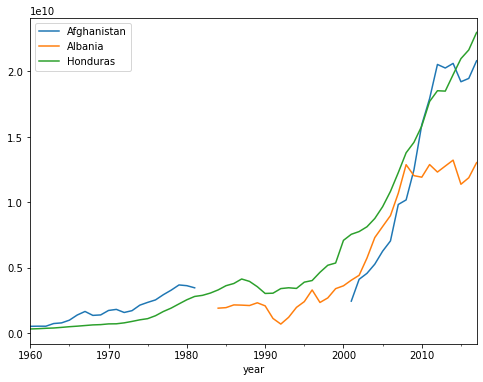

In [ ]:
df_melt = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='GDP')

df_melt['year'] = pd.to_datetime(df_melt['year'])

def plot_results(column_name):
    # plot the results for Afghanistan, Albania, and Honduras
    fig, ax = plt.subplots(figsize=(8,6))

    df_melt[(df_melt['Country Name'] == 'Afghanistan') | 
            (df_melt['Country Name'] == 'Albania') | 
            (df_melt['Country Name'] == 'Honduras')].groupby('Country Name').plot('year', column_name, legend=True, ax=ax)
    ax.legend(labels=['Afghanistan', 'Albania', 'Honduras'])
    
plot_results('GDP')

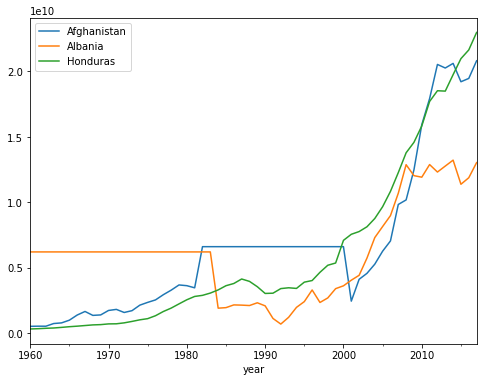

In [ ]:
df_melt['GDP_filled'] = df_melt.groupby('Country Name')['GDP'].transform(lambda x: x.fillna(x.mean()))
plot_results('GDP_filled')

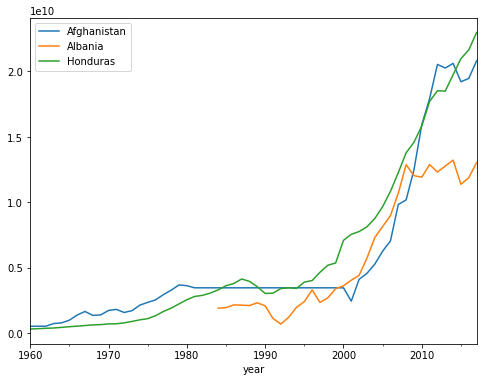

In [ ]:
df_melt['GDP_ffill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill')
plot_results('GDP_ffill')

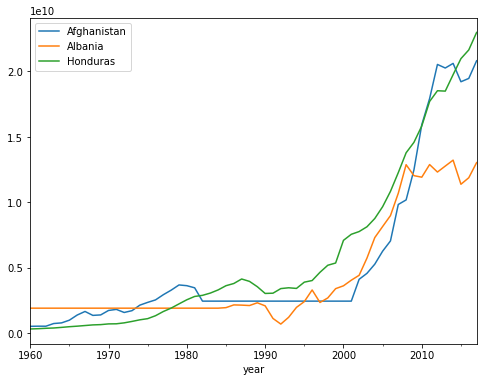

In [ ]:
df_melt['GDP_bfill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='bfill')
plot_results('GDP_bfill')

In [ ]:
# Run forward fill and backward fill on the GDP data
df_melt['GDP_ff_bf'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill').fillna(method='bfill')

# Check if any GDP values are null
df_melt['GDP_ff_bf'].isnull().sum()

0

> ## Duplicate Data


From the World Bank GDP data, count the number of countries that have had a project totalamt greater than 1 billion dollars (1,000,000,000). To get the count, you'll have to remove duplicate data rows.

In [ ]:
projects = pd.read_csv('./world-bank-datasets/projects_data.csv', dtype=str)
projects.drop('Unnamed: 56', axis=1, inplace=True)
projects['totalamt'] = pd.to_numeric(projects['totalamt'].str.replace(',', ''))
projects['countryname'] = projects['countryname'].str.split(';', expand=True)[0]
projects['boardapprovaldate'] = pd.to_datetime(projects['boardapprovaldate'])
print(projects[projects['totalamt'] > 1000000000]['countryname'].nunique())
projects[projects['totalamt'] > 1000000000]['countryname'].unique()

17


array(['Arab Republic of Egypt', 'Republic of Iraq', 'Republic of Peru',
       'Republic of India', 'Romania', 'Republic of Poland',
       'Republic of Indonesia', 'Republic of Kazakhstan',
       "People's Republic of Bangladesh", 'United Mexican States',
       'Federative Republic of Brazil', 'Republic of South Africa',
       'Republic of Turkey', 'Hungary', 'Argentine Republic',
       'Republic of Korea', 'Russian Federation'], dtype=object)

> ## Dummy Variables

The idea is to transform categorical data like this:

| Project ID | Project Category |
|------------|------------------|
| 0          | Energy           |
| 1          | Transportation   |
| 2          | Health           |
| 3          | Employment       |

into new features that look like this:

| Project ID | Energy | Transportation | Health | Employment |
|------------|--------|----------------|--------|------------|
| 0          | 1      | 0              | 0      | 0          |
| 1          | 0      | 1              | 0      | 0          |
| 2          | 0      | 0              | 1      | 0          |
| 3          | 0      | 0              | 0      | 1          |


The reasoning behind these transformations is that machine learning algorithms read in numbers not text. Text needs to be converted into numbers. You could assign a number to each category like 1, 2, 3, and 4. But a categorical variable has no inherent order, so you want to reflect this in your features.

Pandas makes it very easy to create dummy variables with the [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) method.

In [ ]:
projects = pd.read_csv('./world-bank-datasets/projects_data.csv', dtype=str)
projects.drop('Unnamed: 56', axis=1, inplace=True)
projects['totalamt'] = pd.to_numeric(projects['totalamt'].str.replace(',', ''))
projects['countryname'] = projects['countryname'].str.split(';', expand=True)[0]
projects['boardapprovaldate'] = pd.to_datetime(projects['boardapprovaldate'])

# keep the project name, lending, sector and theme data
sector = projects.copy()
sector = sector[['project_name', 'lendinginstr', 'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector',
          'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
          'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ',
          'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name',
          'mjtheme4name', 'mjtheme5name']]

In [ ]:
sector.head()

project_name  \
0   Creating a Trade in Value-Added Database for ...   
1                       Productive Inclusion Project   
2  Additional Financing for Health Sector Support...   
3  Public-Private Partnerships and Public Investm...   
4                          Nigeria For Women Project   

                   lendinginstr                      sector1  \
0  Investment Project Financing                         !$!0   
1  Investment Project Financing                         !$!0   
2  Investment Project Financing                         !$!0   
3  Investment Project Financing                         !$!0   
4  Investment Project Financing  Social Protection!$!63!$!SA   

                                        sector2  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4  Other Industry; Trade and Services!$!25!$!YZ   

                                            sector3  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4  Other Agriculture; Fishing and Forestry!$!2!$!AZ   

                                 sector4 sector5  \
0                                    NaN     NaN   
1                                    NaN     NaN   
2                                    NaN     NaN   
3                                    NaN     NaN   
4  Other Public Administration!$!10!$!BZ     NaN   

                                              sector mjsector1 mjsector2  ...  \
0                                                NaN       NaN       NaN  ...   
1                                                NaN       NaN       NaN  ...   
2                                                NaN       NaN       NaN  ...   
3                                                NaN       NaN       NaN  ...   
4  Social Protection;Social Protection;Other Indu...       NaN       NaN  ...   

  theme4 theme5 theme  goal financier mjtheme1name mjtheme2name mjtheme3name  \
0    NaN    NaN    NaN  NaN       NaN          NaN          NaN          NaN   
1    NaN    NaN    NaN  NaN       NaN          NaN          NaN          NaN   
2    NaN    NaN    NaN  NaN       NaN          NaN          NaN          NaN   
3    NaN    NaN    NaN  NaN       NaN          NaN          NaN          NaN   
4    NaN    NaN    NaN  NaN       NaN          NaN          NaN          NaN   

  mjtheme4name mjtheme5name  
0          NaN          NaN  
1          NaN          NaN  
2          NaN          NaN  
3          NaN          NaN  
4          NaN          NaN  

[5 rows x 27 columns]

In [ ]:
100 * sector.isnull().sum() / sector.shape[0]

project_name      0.000000
lendinginstr      1.348093
sector1           0.000000
sector2          47.791539
sector3          64.450899
sector4          76.019290
sector5          85.132617
sector            3.496274
mjsector1       100.000000
mjsector2       100.000000
mjsector3       100.000000
mjsector4       100.000000
mjsector5       100.000000
mjsector          3.496274
theme1            0.000000
theme2           46.005042
theme3           58.987286
theme4           71.317405
theme5           83.954406
theme           100.000000
goal             33.510522
financier        61.310829
mjtheme1name    100.000000
mjtheme2name    100.000000
mjtheme3name    100.000000
mjtheme4name    100.000000
mjtheme5name    100.000000
dtype: float64

In [ ]:
uniquesectors1 = sector['sector1'].sort_values().unique()
list(uniquesectors1)

['!$!0',
 '(Historic)Agency reform!$!50!$!AG',
 '(Historic)Agricultural credit!$!100!$!AC',
 '(Historic)Agricultural extension!$!100!$!AE',
 '(Historic)Agriculture adjustment!$!100!$!AA',
 '(Historic)Agriculture adjustment!$!60!$!AA',
 '(Historic)Agro-industry and marketing!$!100!$!AM',
 '(Historic)Agro-industry!$!100!$!AN',
 '(Historic)Annual crops!$!100!$!AQ',
 '(Historic)Basic health!$!100!$!HB',
 '(Historic)Business environment!$!100!$!DB',
 '(Historic)Civil service reform!$!100!$!BA',
 '(Historic)Civil service reform!$!50!$!BA',
 '(Historic)Decentralization!$!100!$!BD',
 '(Historic)Distribution and transmission!$!100!$!PD',
 '(Historic)Economic management!$!100!$!ME',
 '(Historic)Economic management!$!40!$!ME',
 '(Historic)Education adjustment!$!100!$!EE',
 '(Historic)Electric power and other energy adjustment!$!100!$!PP',
 '(Historic)Environment adjustment!$!100!$!VV',
 '(Historic)Environmental institutions!$!100!$!VI',
 '(Historic)Fertilizer and other chemicals!$!100!$!IC',
 '(H

In [ ]:
print('Number of unique values in sector1:', len(uniquesectors1))

Number of unique values in sector1: 3060


In [ ]:
sector['sector1'] = sector['sector1'].replace('!$!0', np.nan)
sector['sector1'] = sector['sector1'].replace('!.+', '', regex=True)
sector['sector1'] = sector['sector1'].replace('^(\(Historic\))', '', regex=True)

In [ ]:
uniquesectors1 = sector['sector1'].sort_values().unique()
list(uniquesectors1)

['Adult; Basic and Continuing Education',
 'Agency reform',
 'Agricultural Extension; Research; and Other Support Activities',
 'Agricultural credit',
 'Agricultural extension',
 'Agricultural markets; commercialization and agri-business',
 'Agriculture adjustment',
 'Agro-industry',
 'Agro-industry and marketing',
 'Animal production',
 'Annual crops',
 'Aviation',
 'Banking Institutions',
 'Basic health',
 'Business environment',
 'Capital Markets',
 'Central Government (Central Agencies)',
 'Civil service reform',
 'Compulsory pension and unemployment insurance',
 'Crops',
 'Decentralization',
 'Distribution and transmission',
 'Early Childhood Education',
 'Economic management',
 'Education adjustment',
 'Electric power and other energy adjustment',
 'Energy Transmission and Distribution',
 'Energy efficiency in Heat and Power',
 'Environment adjustment',
 'Environmental institutions',
 'Fertilizer and other chemicals',
 'Financial adjustment',
 'Financial sector development',
 'Fi

In [ ]:
print('Number of unique values in sector1:', len(uniquesectors1))

Number of unique values in sector1: 156


In [ ]:
print('Percentage of null values after cleaning:',
      100 * sector['sector1'].isnull().sum() / sector['sector1'].shape[0])

Percentage of null values after cleaning: 3.4962735642262164


In [ ]:
dummies = pd.DataFrame(pd.get_dummies(sector['sector1']))
projects['year'] = projects['boardapprovaldate'].dt.year
df = projects[['totalamt','year']]
df_final = pd.concat([df, dummies], axis=1)
df_final.head()

totalamt    year  Adult; Basic and Continuing Education  Agency reform  \
0          0  2018.0                                      0              0   
1  200000000  2018.0                                      0              0   
2   58330000  2018.0                                      0              0   
3   20000000  2018.0                                      0              0   
4  100000000  2018.0                                      0              0   

   Agricultural Extension; Research; and Other Support Activities  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   Agricultural credit  Agricultural extension  \
0                    0                       0   
1                    0                       0   
2                    0                       0   
3                    0                       0   
4                    0                       0   

   Agricultural markets; commercialization and agri-business  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           

   Agriculture adjustment  Agro-industry  ...  Urban environment  \
0                       0              0  ...                  0   
1                       0              0  ...                  0   
2                       0              0  ...                  0   
3                       0              0  ...                  0   
4                       0              0  ...                  0   

   Urban housing  Urban management  Urban transport  Urban water supply  \
0              0                 0                0                   0   
1              0                 0                0                   0   
2              0                 0                0                   0   
3              0                 0                0                   0   
4              0                 0                0                   0   

   Vocational training  Waste Management  Water Supply  \
0                    0                 0             0   
1                    0                 0             0   
2                    0                 0             0   
3                    0                 0             0   
4                    0                 0             0   

   Water supply and sanitation adjustment  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Workforce Development and Vocational Education  
0                                               0  
1                                               0  
2                                               0  
3                                               0  
4                                               0  

[5 rows x 157 columns]

> ## Finding Outliers


In [ ]:
gdp = pd.read_csv('./world-bank-datasets/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


population = pd.read_csv('./world-bank-datasets/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)

In [ ]:
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', value_name='gdp')

gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby(
            'Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', value_name='population')

population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(
    method='ffill').fillna(method='bfill')


df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

In [ ]:
df_2016 = df_country[df_country['year'] == '2016']
df_2016.head(10)

Country Name  year           gdp   population
14784                 Aruba  2016  2.584464e+09     104822.0
14785           Afghanistan  2016  1.946902e+10   34656032.0
14786                Angola  2016  9.533720e+10   28813463.0
14787               Albania  2016  1.188368e+10    2876101.0
14788               Andorra  2016  2.877312e+09      77281.0
14789            Arab World  2016  2.500164e+12  406452690.0
14790  United Arab Emirates  2016  3.570451e+11    9269612.0
14791             Argentina  2016  5.548609e+11   43847430.0
14792               Armenia  2016  1.054614e+10    2924816.0
14793        American Samoa  2016  6.580000e+08      55599.0

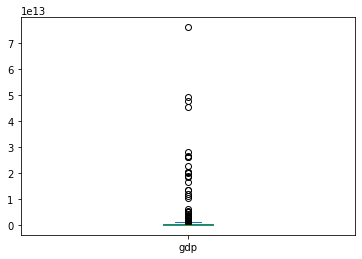

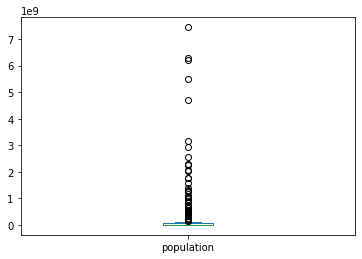

In [ ]:
df_2016.plot('population',kind='box');
df_2016.plot('gdp',kind='box');

Use the Tukey rule to determine what values of the population data are outliers for the year 2016. The Tukey rule finds outliers in one-dimension. The steps are:

* Find the first quartile (ie .25 quantile)
* Find the third quartile (ie .75 quantile)
* Calculate the inter-quartile range (Q3 - Q1)
* Any value that is greater than Q3 + 1.5 * IQR is an outlier
* Any value that is less than Qe - 1.5 * IQR is an outlier

In [ ]:
population_2016 = df_2016[['Country Name','population']]

Q1 = population_2016['population'].quantile(0.25)
Q3 = population_2016['population'].quantile(0.75)
IQR = Q3 - Q1
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

population_outliers = population_2016[(population_2016['population'] > max_value) 
                    | (population_2016['population'] < min_value)]
population_outliers

Country Name    population
14789                                         Arab World  4.064527e+08
14802                                         Bangladesh  1.629516e+08
14811                                             Brazil  2.076529e+08
14822                                              China  1.378665e+09
14843        East Asia & Pacific (excluding high income)  2.053299e+09
14844                         Early-demographic dividend  3.170658e+09
14845                                East Asia & Pacific  2.298727e+09
14846      Europe & Central Asia (excluding high income)  4.132349e+08
14847                              Europe & Central Asia  9.116863e+08
14850                                          Euro area  3.406174e+08
14855                                     European Union  5.112190e+08
14856           Fragile and conflict affected situations  4.995085e+08
14877                                        High income  1.242138e+09
14880             Heavily indebted poor countries (HIPC)  7.446030e+08
14884                                          IBRD only  4.699232e+09
14885                                   IDA & IBRD total  6.273585e+09
14886                                          IDA total  1.574353e+09
14887                                          IDA blend  5.211590e+08
14888                                          Indonesia  2.611155e+08
14889                                           IDA only  1.053194e+09
14891                                              India  1.324171e+09
14910  Latin America & Caribbean (excluding high income)  5.622548e+08
14916                          Latin America & Caribbean  6.376639e+08
14917       Least developed countries: UN classification  9.793879e+08
14918                                         Low income  7.140223e+08
14921                                Lower middle income  2.931076e+09
14922                                Low & middle income  6.202020e+09
14924                          Late-demographic dividend  2.264569e+09
14935                         Middle East & North Africa  4.367380e+08
14938                                      Middle income  5.487997e+09
14943  Middle East & North Africa (excluding high inc...  3.737191e+08
14952                                      North America  3.597359e+08
14956                                            Nigeria  1.859896e+08
14963                                       OECD members  1.289987e+09
14966                                           Pakistan  1.932035e+08
14973                           Pre-demographic dividend  8.792925e+08
14980                          Post-demographic dividend  1.102779e+09
14984                                 Russian Federation  1.443424e+08
14986                                         South Asia  1.766394e+09
14997         Sub-Saharan Africa (excluding high income)  1.033118e+09
14999                                 Sub-Saharan Africa  1.033213e+09
15012         East Asia & Pacific (IDA & IBRD countries)  2.027896e+09
15013       Europe & Central Asia (IDA & IBRD countries)  4.553794e+08
15018  Latin America & the Caribbean (IDA & IBRD coun...  6.215349e+08
15020  Middle East & North Africa (IDA & IBRD countries)  3.691675e+08
15022                            South Asia (IDA & IBRD)  1.766394e+09
15023          Sub-Saharan Africa (IDA & IBRD countries)  1.033213e+09
15031                                Upper middle income  2.556922e+09
15033                                      United States  3.234059e+08
15041                                              World  7.444157e+09

In [ ]:
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]

In [ ]:
population_2016 = df_2016[['Country Name','population']]
Q1 = population_2016['population'].quantile(0.25)
Q3 = population_2016['population'].quantile(0.75)
IQR = Q3 - Q1
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR
population_outliers = population_2016[(population_2016['population'] > max_value)
                                      | (population_2016['population'] < min_value)]
population_outliers

Country Name    population
14802          Bangladesh  1.629516e+08
14811              Brazil  2.076529e+08
14822               China  1.378665e+09
14825    Congo, Dem. Rep.  7.873615e+07
14837             Germany  8.234867e+07
14849    Egypt, Arab Rep.  9.568868e+07
14854            Ethiopia  1.024032e+08
14859              France  6.685977e+07
14863      United Kingdom  6.559556e+07
14888           Indonesia  2.611155e+08
14891               India  1.324171e+09
14894  Iran, Islamic Rep.  8.027743e+07
14898               Italy  6.062750e+07
14901               Japan  1.269945e+08
14936              Mexico  1.275404e+08
14956             Nigeria  1.859896e+08
14966            Pakistan  1.932035e+08
14969         Philippines  1.033202e+08
14984  Russian Federation  1.443424e+08
15015            Thailand  6.886351e+07
15026              Turkey  7.951243e+07
15033       United States  3.234059e+08
15039             Vietnam  9.456907e+07

In [ ]:
gdp_2016 = df_2016[['Country Name','gdp']]
Q1 = gdp_2016['gdp'].quantile(0.25)
Q3 = gdp_2016['gdp'].quantile(0.75)
IQR = Q3 - Q1
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR
gdp_outliers = gdp_2016[(gdp_2016['gdp'] > max_value) | (gdp_2016['gdp'] < min_value)]
gdp_outliers

Country Name           gdp
14791           Argentina  5.548609e+11
14795           Australia  1.208039e+12
14796             Austria  3.908000e+11
14799             Belgium  4.675455e+11
14811              Brazil  1.793989e+12
14817              Canada  1.535768e+12
14819         Switzerland  6.687453e+11
14822               China  1.119099e+13
14837             Germany  3.477796e+12
14852               Spain  1.237255e+12
14859              France  2.465134e+12
14863      United Kingdom  2.650850e+12
14888           Indonesia  9.322565e+11
14891               India  2.274230e+12
14894  Iran, Islamic Rep.  4.189767e+11
14898               Italy  1.859384e+12
14901               Japan  4.949273e+12
14908         Korea, Rep.  1.414804e+12
14936              Mexico  1.076912e+12
14956             Nigeria  4.046527e+11
14958         Netherlands  7.772275e+11
14972              Poland  4.714003e+11
14984  Russian Federation  1.284728e+12
14987        Saudi Arabia  6.449355e+11
15005              Sweden  5.144600e+11
15015            Thailand  4.117552e+11
15026              Turkey  8.637216e+11
15033       United States  1.862448e+13
15036       Venezuela, RB  4.823593e+11

some countries have high GDP but are not population outliers vive versa.


2-Dimensional Analysis
Next, look at the data from a two-dimensional perspective.

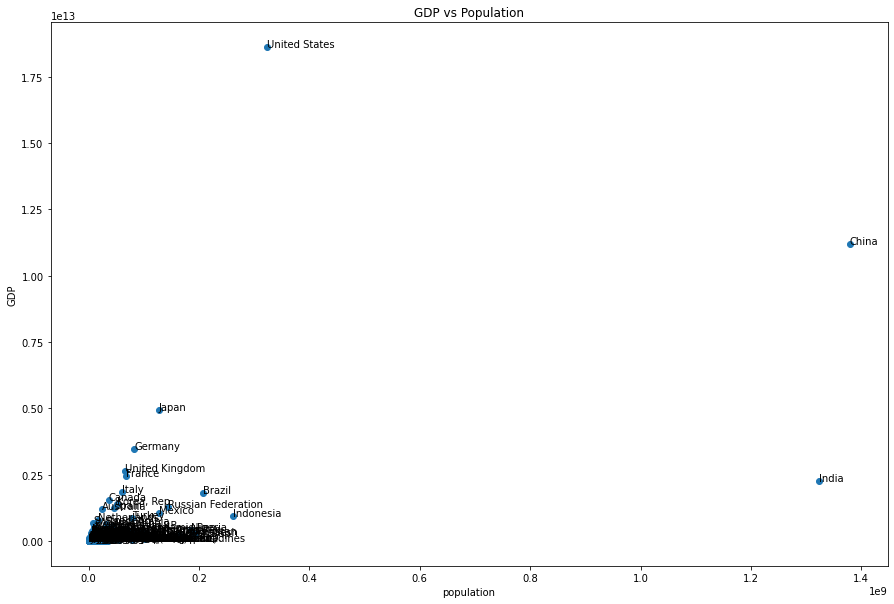

In [ ]:
x = list(df_2016['population'])
y = list(df_2016['gdp'])
text = df_2016['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

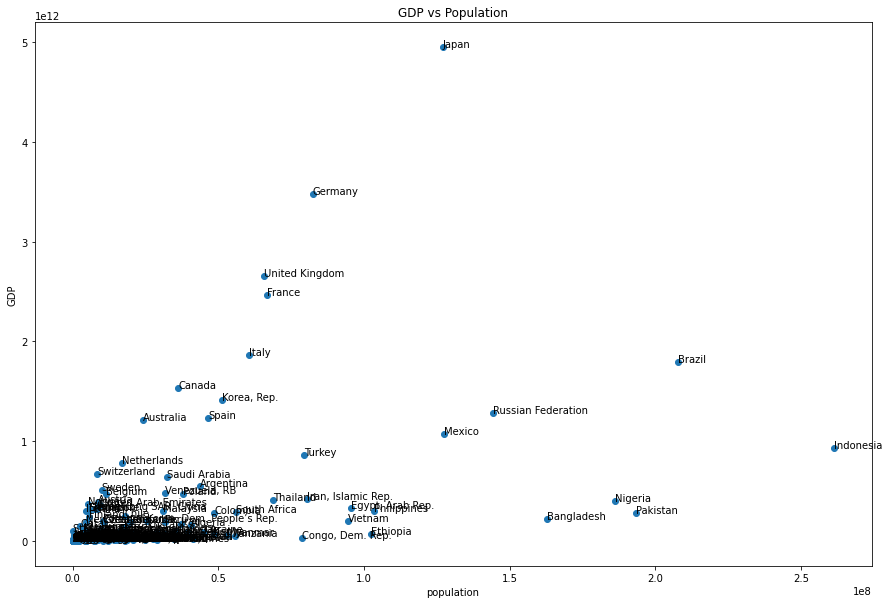

In [ ]:
df_no_large = (df_2016['Country Name'] != 'United States') & (df_2016['Country Name'] != 'India') & (df_2016['Country Name'] != 'China')
x = list(df_2016[df_no_large]['population'])
y = list(df_2016[df_no_large]['gdp'])
text = df_2016[df_no_large]['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

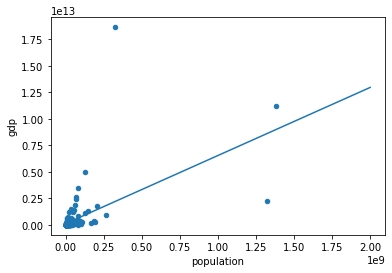

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df_2016['population'].values.reshape(-1, 1), df_2016['gdp'].values.reshape(-1, 1))

inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))

df_2016.plot('population', 'gdp', kind='scatter')
plt.plot(inputs, predictions)

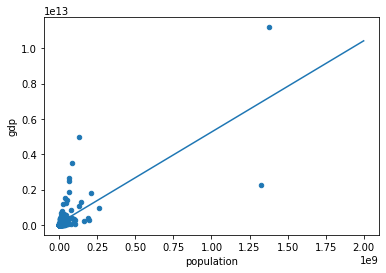

In [ ]:
df_2016[df_2016['Country Name'] != 'United States'].plot('population', 'gdp', kind='scatter')


model.fit(df_2016[df_2016['Country Name'] != 'United States']['population'].values.reshape(-1, 1), 
          df_2016[df_2016['Country Name'] != 'United States']['gdp'].values.reshape(-1, 1))

inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))
plt.plot(inputs, predictions)

In [ ]:
def tukey_rule(data_frame, column_name):
    data = data_frame[column_name]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    max_value = Q3 + 1.5 * IQR
    min_value = Q1 - 1.5 * IQR
    
    return data_frame[(data_frame[column_name] < max_value) & (data_frame[column_name] > min_value)]

In [ ]:
df_outlier_removed = df_2016.copy()

for column in ['population','gdp']:
    df_outlier_removed = tukey_rule(df_outlier_removed, column)

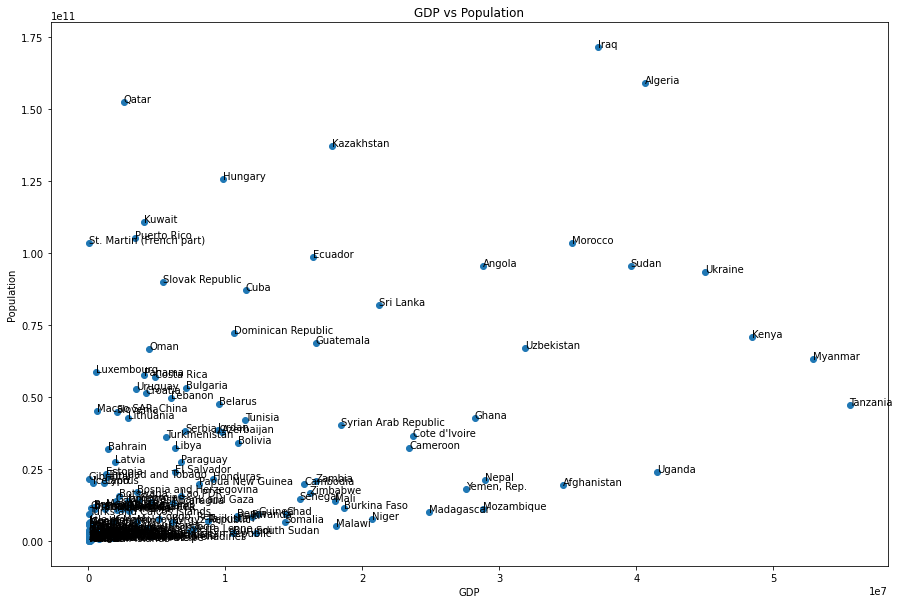

In [ ]:
x = list(df_outlier_removed['population'])
y = list(df_outlier_removed['gdp'])
text = df_outlier_removed['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('GDP')
plt.ylabel('Population')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

# Load 

In this part, I'll load data into different formats: a csv file, a json file, and a SQLite database.

In [ ]:
gdp = pd.read_csv('./world-bank-datasets/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('./world-bank-datasets/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


gdp_melt = gdp.melt(id_vars=['Country Name', 'Country Code'], 
                    var_name='year', 
                    value_name='gdp')

gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby(['Country Name', 'Country Code'])['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name', 'Country Code'], 
                                  var_name='year', 
                                  value_name='population')

population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

df_indicator = gdp_melt.merge(population_melt, on=('Country Name', 'Country Code', 'year'))

non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

df_indicator  = df_indicator[~df_indicator['Country Name'].isin(non_countries)]
df_indicator.reset_index(inplace=True, drop=True)
df_indicator.columns = ['countryname', 'countrycode', 'year', 'gdp', 'population']
df_indicator.head(10)

countryname countrycode  year           gdp  population
0                 Aruba         ABW  1960  1.916242e+09     54211.0
1           Afghanistan         AFG  1960  5.377778e+08   8996351.0
2                Angola         AGO  1960  1.857319e+10   5643182.0
3               Albania         ALB  1960  1.857319e+10   1608800.0
4               Andorra         AND  1960  1.857319e+10     13411.0
5  United Arab Emirates         ARE  1960  1.857319e+10     92634.0
6             Argentina         ARG  1960  1.857319e+10  20619075.0
7               Armenia         ARM  1960  1.857319e+10   1874120.0
8        American Samoa         ASM  1960  1.857319e+10     20013.0
9   Antigua and Barbuda         ATG  1960  1.857319e+10     55339.0

In [ ]:
from pycountry import countries
df_projects = pd.read_csv('./world-bank-datasets/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)
df_projects['countryname'] = df_projects['countryname'].str.split(';').str.get(0)


from collections import defaultdict

country_not_found = [] 
project_country_abbrev_dict = defaultdict(str) 
for country in df_projects['countryname'].drop_duplicates().sort_values():
    try: 
        project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
    except:
        country_not_found.append(country)

country_not_found_mapping = {'Co-operative Republic of Guyana': 'GUY',
             'Commonwealth of Australia':'AUS',
             'Democratic Republic of Sao Tome and Prin':'STP',
             'Democratic Republic of the Congo':'COD',
             'Democratic Socialist Republic of Sri Lan':'LKA',
             'East Asia and Pacific':'EAS',
             'Europe and Central Asia': 'ECS',
             'Islamic  Republic of Afghanistan':'AFG',
             'Latin America':'LCN',
              'Caribbean':'LCN',
             'Macedonia':'MKD',
             'Middle East and North Africa':'MEA',
             'Oriental Republic of Uruguay':'URY',
             'Republic of Congo':'COG',
             "Republic of Cote d'Ivoire":'CIV',
             'Republic of Korea':'KOR',
             'Republic of Niger':'NER',
             'Republic of Kosovo':'XKX',
             'Republic of Rwanda':'RWA',
              'Republic of The Gambia':'GMB',
              'Republic of Togo':'TGO',
              'Republic of the Union of Myanmar':'MMR',
              'Republica Bolivariana de Venezuela':'VEN',
              'Sint Maarten':'SXM',
              "Socialist People's Libyan Arab Jamahiriy":'LBY',
              'Socialist Republic of Vietnam':'VNM',
              'Somali Democratic Republic':'SOM',
              'South Asia':'SAS',
              'St. Kitts and Nevis':'KNA',
              'St. Lucia':'LCA',
              'St. Vincent and the Grenadines':'VCT',
              'State of Eritrea':'ERI',
              'The Independent State of Papua New Guine':'PNG',
              'West Bank and Gaza':'PSE',
              'World':'WLD'}

project_country_abbrev_dict.update(country_not_found_mapping)
df_projects['countrycode'] = df_projects['countryname'].apply(lambda x: project_country_abbrev_dict[x])
df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])
df_projects['year'] = df_projects['boardapprovaldate'].dt.year.astype(str).str.slice(stop=4)
df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',""))
df_projects = df_projects[['id', 'countryname', 'countrycode', 'totalamt', 'year']]
df_projects.head(10)

id                       countryname countrycode   totalamt  year
0  P162228                             World         WLD          0  2018
1  P163962  Democratic Republic of the Congo         COD  200000000  2018
2  P167672   People's Republic of Bangladesh         BGD   58330000  2018
3  P158768  Islamic  Republic of Afghanistan         AFG   20000000  2018
4  P161364       Federal Republic of Nigeria         NGA  100000000  2018
5  P161483               Republic of Tunisia         TUN  500000000  2018
6  P161885       Federal Republic of Nigeria         NGA  350000000  2018
7  P162069       Federal Republic of Nigeria         NGA  225000000  2018
8  P163540       Federal Republic of Nigeria         NGA  125000000  2018
9  P163576                 Lebanese Republic         LBN  329900000  2018

In [ ]:
df_merged = df_projects.merge(df_indicator, how='left', on=['countrycode', 'year'])
df_merged[(df_merged['year'] == '2017') & (df_merged['countryname_y'] == 'Jordan')]

id                countryname_x countrycode   totalamt  year  \
256  P161982  Hashemite Kingdom of Jordan         JOR          0  2017   
301  P162407  Hashemite Kingdom of Jordan         JOR  147700000  2017   
318  P160103  Hashemite Kingdom of Jordan         JOR          0  2017   
464  P161905  Hashemite Kingdom of Jordan         JOR   50000000  2017   
495  P163387  Hashemite Kingdom of Jordan         JOR   36100000  2017   
515  P163241  Hashemite Kingdom of Jordan         JOR          0  2017   

    countryname_y           gdp  population  
256        Jordan  4.006831e+10   9702353.0  
301        Jordan  4.006831e+10   9702353.0  
318        Jordan  4.006831e+10   9702353.0  
464        Jordan  4.006831e+10   9702353.0  
495        Jordan  4.006831e+10   9702353.0  
515        Jordan  4.006831e+10   9702353.0

In [ ]:
df_merged.sample(5)

id                     countryname_x countrycode   totalamt  year  \
1487   P155443  Islamic  Republic of Afghanistan         AFG   21500000  2015   
277    P147009        People's Republic of China         CHN  150000000  2017   
878    P155191                 Republic of Haiti         HTI   30000000  2016   
16174  P106693              Republic of Colombia         COL   50000000   nan   
3248   P127319               Republic of Liberia         LBR    5000000  2011   

      countryname_y           gdp    population  
1487    Afghanistan  1.921556e+10  3.373649e+07  
277           China  1.223770e+13  1.386395e+09  
878           Haiti  7.970649e+09  1.084733e+07  
16174           NaN           NaN           NaN  
3248        Liberia  1.545400e+09  4.070167e+06

In [ ]:
df_merged.to_json('countrydata.json', orient='records')

In [ ]:
df_merged.to_csv('countrydata.csv', index=False)

In [ ]:
import sqlite3
conn = sqlite3.connect('worldbank.db')
df_merged.to_sql('merged', con = conn, if_exists='replace', index=False)

18248

In [ ]:
pd.read_sql('SELECT * FROM merged WHERE year = "2017" AND countrycode = "BRA"', con = conn).head()

id                  countryname_x countrycode   totalamt  year  \
0  P162033  Federative Republic of Brazil         BRA  125000000  2017   
1  P158000  Federative Republic of Brazil         BRA          0  2017   
2  P163868  Federative Republic of Brazil         BRA  250000000  2017   
3  P152285  Federative Republic of Brazil         BRA          0  2017   
4  P147158  Federative Republic of Brazil         BRA   50000000  2017   

  countryname_y           gdp   population  
0        Brazil  2.055506e+12  209288278.0  
1        Brazil  2.055506e+12  209288278.0  
2        Brazil  2.055506e+12  209288278.0  
3        Brazil  2.055506e+12  209288278.0  
4        Brazil  2.055506e+12  209288278.0

In [ ]:
conn.commit()
conn.close()